## 🎓Projeto Final - Capacitação IA (Ciclo 2)
## 👨Aluno: Rodrigo Serafim F. Silva

## 📚 Bibliotecas Necessárias

In [19]:
# 1) Obter um dataset de classificação ou de reg. diferentes dos já apresentados durante a capacitação (ciclo I e II).

#- Os datasets podem ser obtidos dos seguintes locais:

#- Datasets do SkLearn: https://scikit-learn.org/stable/datasets/toy_dataset.html
#- Datasets do Seaborn: https://github.com/mwaskom/seaborn-data
#- Datasets do UCI: https://archive.ics.uci.edu/datasets
#- Datasets do Kaggle: https://www.kaggle.com/datasets

#- Qualquer fonte de dados da internet, empresa que trabalha etc.
#-  ATENÇÃO: O ideal seria o aluno trazer algum problema real com o qual
#-  tem contato na faculdade, empresa, ou algum problema que acha interessante analisar.


# Importações necessárias
import seaborn as sns  # Biblioteca para visualização de dados
import numpy as np  # Biblioteca para manipulação de arrays numéricos
import pandas as pd  # Biblioteca para manipulação de dados tabulares
import matplotlib.pyplot as plt  # Biblioteca para plotagem de gráficos
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler  # Ferramentas para pré-processamento de dados
from sklearn.compose import make_column_transformer  # Ferramenta para criar transformações de colunas
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, confusion_matrix  # Métricas de avaliação de modelos
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier  # Modelos de Machine Learning
from sklearn.svm import SVC  # Modelo de Support Vector Machine
from sklearn.neighbors import KNeighborsClassifier  # Modelo de K-Nearest Neighbors
from sklearn.linear_model import LogisticRegression  # Modelo de Regressão Logística
from sklearn.tree import DecisionTreeClassifier  # Modelo de Árvore de Decisão
from sklearn.datasets import load_breast_cancer  # Conjunto de dados Breast Cancer
from sklearn.model_selection import train_test_split  # Função para dividir os dados em conjuntos de treinamento e teste
from xgboost import XGBClassifier  # Modelo XGBoost
from lightgbm import LGBMClassifier  # Modelo LightGBM
from sklearn.model_selection import cross_val_score  # Função para realizar validação cruzada
from sklearn.metrics import make_scorer, precision_score, recall_score, roc_auc_score  # Métricas de avaliação adicionais
from sklearn.feature_selection import SelectKBest, f_classif  # Ferramentas de seleção de características
from sklearn.neighbors import KNeighborsRegressor  # Modelo de regressão K-Nearest Neighbors
from sklearn.tree import DecisionTreeRegressor  # Modelo de regressão Árvore de Decisão
from sklearn.neural_network import MLPClassifier, MLPRegressor  # Modelo de Multi-layer Perceptron
from sklearn.svm import SVR  # Modelo de Support Vector Regression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier  # Modelos de Random Forest
from xgboost import XGBClassifier, XGBRegressor  # Modelos XGBoost
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.neighbors import NearestNeighbors
import numpy as np

import mlflow  # Plataforma para gerenciamento de ciclo de vida de modelos
import mlflow.sklearn  # Integração do MLflow com modelos do scikit-learn
from pyngrok import ngrok  # Ferramenta para expor aplicações web localmente

#!pip install mlflow --quiet
#!pip install pyngrok --quiet
#!pip install deslib
#!pip install xgboost
#!pip install imbalanced-learn



## 🛠️ Implementação Manual dos Modelos


---



A implementação manual dos modelos é uma escolha estratégica para contornar possíveis problemas de dependência e garantir a flexibilidade e controle sobre o código (3.4).

OLA: 🏋️‍♂️
LCA: 🌐
KNORA-U: 🧠
KNORA-E: 🧭
MCB: 📊

In [20]:
#Para contornar erros de carregamento de modelos de machine learning, como "undefined" (3.4), optei por implementar os modelos diretamente no código-fonte.
#essa solução foi escolhida como último recurso para garantir o desenvolvimento contínuo do sistema.
#embora essa abordagem possa ter algumas limitações, como menor flexibilidade e escalabilidade, ela foi documentada de forma clara para facilitar a
#compreensão e manutenção do código por outros desenvolvedores.

class OLA(BaseEstimator, ClassifierMixin):

    # Inicializa o classificador OLA
    def __init__(self, base_estimator=None):
        # Atribui o estimador base
        self.base_estimator = base_estimator

    # Método para treinar o classificador
    def fit(self, X, y):
        # Verifica e ajusta os dados de entrada
        X, y = check_X_y(X, y)
        # Obtém as classes únicas dos rótulos
        self.classes_ = np.unique(y)
        # Lista para armazenar os estimadores treinados para cada classe
        self.estimators_ = []
        # Itera sobre as classes e treina um estimador para cada uma delas
        for target_class in self.classes_:
            # Treina o estimador base apenas nos dados pertencentes à classe atual
            estimator = self.base_estimator.fit(X[y == target_class], y[y == target_class])
            # Armazena o estimador treinado na lista
            self.estimators_.append(estimator)
        # Retorna o próprio objeto
        return self

    # Método para realizar a predição
    def predict(self, X):
        # Verifica se o classificador foi treinado
        check_is_fitted(self)
        # Verifica e ajusta os dados de entrada
        X = check_array(X)

        # Matriz para armazenar as votações de cada estimador
        votes = np.zeros((X.shape[0], len(self.estimators_)))
        # Itera sobre os estimadores e faz a predição para cada um deles
        for i, estimator in enumerate(self.estimators_):
            votes[:, i] = estimator.predict(X)

        # Calcula a predição final utilizando votação majoritária
        y_pred = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=votes)
        # Retorna os rótulos preditos
        return y_pred

class LCA(BaseEstimator, ClassifierMixin):

    # Inicializa o classificador LCA
    def __init__(self, base_estimator=None, k_neighbors=3):
        # Atribui o estimador base e o número de neighbors
        self.base_estimator = base_estimator
        self.k_neighbors = k_neighbors

    # Método para treinar o classificador
    def fit(self, X, y):
        # Verifica e ajusta os dados de entrada
        X, y = check_X_y(X, y)
        # Obtém as classes únicas dos rótulos
        self.classes_ = np.unique(y)
        # Lista para armazenar os estimadores treinados para cada classe
        self.estimators_ = []
        # Inicializa o modelo de k-neighbors mais próximos
        self.nn_ = NearestNeighbors(n_neighbors=self.k_neighbors + 1)
        # Itera sobre as classes e treina um estimador para cada uma delas
        for target_class in self.classes_:
            # Treina o estimador base apenas nos dados pertencentes à classe atual
            estimator = self.base_estimator.fit(X[y == target_class], y[y == target_class])
            # Armazena o estimador treinado na lista
            self.estimators_.append(estimator)
            # Ajusta o modelo de k-neighbors mais próximos com os dados da classe atual
            self.nn_.fit(X[y == target_class])
        # Retorna o próprio objeto
        return self

    # Método para realizar a predição
    def predict(self, X):
        # Verifica se o classificador foi treinado
        check_is_fitted(self)
        # Verifica e ajusta os dados de entrada
        X = check_array(X)

        # Matriz para armazenar as votações de cada estimador
        votes = np.zeros((X.shape[0], len(self.estimators_)))
        # Itera sobre os estimadores e calcula as votações
        for i, estimator in enumerate(self.estimators_):
            # Calcula as distâncias para os k-vizinhos mais próximos
            dists, _ = self.nn_.kneighbors(X)
            # Soma as distâncias, excluindo o vizinho mais próximo (ele mesmo)
            votes[:, i] = np.sum(dists[:, 1:], axis=1)

        # Realiza a predição baseada na menor soma de distâncias
        y_pred = np.argmin(votes, axis=1)
        # Retorna os rótulos preditos
        return y_pred

class KNORAU(BaseEstimator, ClassifierMixin):

    # Inicializa o classificador KNORAU
    def __init__(self, base_estimator=None, k_neighbors=3):
        # Atribui o estimador base e o número de vizinhos
        self.base_estimator = base_estimator
        self.k_neighbors = k_neighbors

    # Método para treinar o classificador
    def fit(self, X, y):
        # Verifica e ajusta os dados de entrada
        X, y = check_X_y(X, y)
        # Obtém as classes únicas dos rótulos
        self.classes_ = np.unique(y)
        # Lista para armazenar os estimadores treinados para cada classe
        self.estimators_ = []
        # Itera sobre as classes e treina um estimador para cada uma delas
        for target_class in self.classes_:
            # Treina o estimador base apenas nos dados pertencentes à classe atual
            estimator = self.base_estimator.fit(X[y == target_class], y[y == target_class])
            # Armazena o estimador treinado na lista
            self.estimators_.append(estimator)
        # Retorna o próprio objeto
        return self

    # Método para realizar a predição
    def predict(self, X):
        # Verifica se o classificador foi treinado
        check_is_fitted(self)
        # Verifica e ajusta os dados de entrada
        X = check_array(X)

        # Matriz para armazenar as votações de cada estimador
        votes = np.zeros((X.shape[0], len(self.estimators_)))
        # Itera sobre os estimadores e calcula as votações
        for i, estimator in enumerate(self.estimators_):
            # Calcula as distâncias para os k-vizinhos mais próximos
            dists, _ = estimator.kneighbors(X, n_neighbors=self.k_neighbors)
            # Soma as distâncias
            votes[:, i] = np.sum(dists, axis=1)

        # Realiza a predição baseada no índice da menor soma de distâncias
        y_pred = np.argmin(votes, axis=1)
        # Retorna os rótulos preditos
        return y_pred

class KNORAE(BaseEstimator, ClassifierMixin):

    # Inicializa o classificador KNORAE
    def __init__(self, base_estimator=None, k_neighbors=3):
        # Atribui o estimador base e o número de vizinhos
        self.base_estimator = base_estimator
        self.k_neighbors = k_neighbors

    # Método para treinar o classificador
    def fit(self, X, y):
        # Verifica e ajusta os dados de entrada
        X, y = check_X_y(X, y)
        # Obtém as classes únicas dos rótulos
        self.classes_ = np.unique(y)
        # Lista para armazenar os estimadores treinados para cada classe
        self.estimators_ = []
        # Itera sobre as classes e treina um estimador para cada uma delas
        for target_class in self.classes_:
            # Treina o estimador base apenas nos dados pertencentes à classe atual
            estimator = self.base_estimator.fit(X[y == target_class], y[y == target_class])
            # Armazena o estimador treinado na lista
            self.estimators_.append(estimator)
        # Retorna o próprio objeto
        return self

    # Método para realizar a predição
    def predict(self, X):
        # Verifica se o classificador foi treinado
        check_is_fitted(self)
        # Verifica e ajusta os dados de entrada
        X = check_array(X)

        # Matriz para armazenar as votações de cada estimador
        votes = np.zeros((X.shape[0], len(self.estimators_)))
        # Itera sobre os estimadores e calcula as votações
        for i, estimator in enumerate(self.estimators_):
            # Calcula as distâncias para os k-vizinhos mais próximos
            dists, _ = estimator.kneighbors(X, n_neighbors=self.k_neighbors)
            # Soma as distâncias
            votes[:, i] = np.sum(dists, axis=1)

        # Realiza a predição baseada no índice da maior soma de distâncias
        y_pred = np.argmax(votes, axis=1)
        # Retorna os rótulos preditos
        return y_pred

class MCB(BaseEstimator, ClassifierMixin):

    # Inicializa o classificador MCB
    def __init__(self, base_estimator=None):
        # Atribui o estimador base
        self.base_estimator = base_estimator

    # Método para treinar o classificador
    def fit(self, X, y):
        # Verifica e ajusta os dados de entrada
        X, y = check_X_y(X, y)
        # Obtém as classes únicas dos rótulos
        self.classes_ = np.unique(y)
        # Lista para armazenar os estimadores treinados para cada classe
        self.estimators_ = []
        # Itera sobre as classes e treina um estimador para cada uma delas
        for target_class in self.classes_:
            # Treina o estimador base apenas nos dados pertencentes à classe atual
            estimator = self.base_estimator.fit(X[y == target_class], y[y == target_class])
            # Armazena o estimador treinado na lista
            self.estimators_.append(estimator)
        # Retorna o próprio objeto
        return self

    # Método para realizar a predição
    def predict(self, X):
        # Verifica se o classificador foi treinado
        check_is_fitted(self)
        # Verifica e ajusta os dados de entrada
        X = check_array(X)

        # Matriz para armazenar as votações de cada estimador
        votes = np.zeros((X.shape[0], len(self.estimators_)))
        # Itera sobre os estimadores e faz a predição para cada um deles
        for i, estimator in enumerate(self.estimators_):
            votes[:, i] = estimator.predict(X)

        # Calcula a predição final utilizando votação majoritária
        y_pred = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=1, arr=votes)
        # Retorna os rótulos preditos
        return y_pred

## 🎀 Dataset de Classificação - Kaggle: Breast Cancer Wisconsin


---



Este dataset contém informações sobre características das células presentes em amostras de tecido de pacientes com suspeita de câncer de mama. As características são medidas a partir de imagens digitalizadas de biópsias por agulha fina de mama.

- 🔢 id: identificação única do paciente.
- 🩺 diagnosis: diagnóstico do paciente (M para maligno, B para benigno).
- 📏 radius_mean: média dos raios das células.
- 🎨 texture_mean: média das texturas das células.
- ⭕ perimeter_mean: média dos perímetros das células.
- 🟦 area_mean: média das áreas das células.
- 🌊 smoothness_mean: média da suavidade das células.
- 💠 compactness_mean: média da compacidade das células.
- 🕳️ concavity_mean: média da concavidade das células.
- 🌟 concave points_mean: média dos pontos côncavos das células.
- 🔄 symmetry_mean: média da simetria das células.
- 🔄 fractal_dimension_mean: média da dimensão fractal das células.

✅ Objetivo: Prever se uma amostra de tecido de mama é benigna ou maligna com base nas características coletadas.

In [21]:
#2) Analisar o dataset usando os métodos do Pandas. Comparar as
#features e verificar se há valores nulos, correspondência entre features,
#converter os labels para números e features categóricas usar One-Hot
#Encoder. Normalizar as features na escala 0..1.

# Url = https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

# Carregar o dataset
dataset = pd.read_csv('data.csv')

# Exibir informações sobre o conjunto de dados
print('\nInformações sobre o Dataset:\n')
print(dataset.info())

# Verificar se há valores nulos no conjunto de dados
print('\nValores Nulos no Dataset:\n')
print(dataset.isnull().sum())

# Exibir as primeiras linhas do conjunto de dados
print('\nAmostra do Dataset Original:\n')
display(dataset.head())

# Converter os labels para números
dataset['diagnosis'] = dataset['diagnosis'].astype('category')
dataset['diagnosis'] = dataset['diagnosis'].cat.codes

# Remover coluna 'Unnamed: 32' (caso esteja presente)
if 'Unnamed: 32' in dataset.columns:
    dataset = dataset.drop(columns=['Unnamed: 32'])

# Normalizar as features na escala 0..1
scaler = MinMaxScaler()
columns_to_normalize = dataset.columns[1:]  # Todas as colunas exceto 'id' e 'diagnosis'
dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])

# Exibir o dataset tratado
print('\nDataset Tratado:\n')
display(dataset.head())


Informações sobre o Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



Dataset Tratado:



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,842517,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,84300903,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,84348301,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,84358402,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


## 🔍📊 Análise Exploratória de Dados


Informações sobre o Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


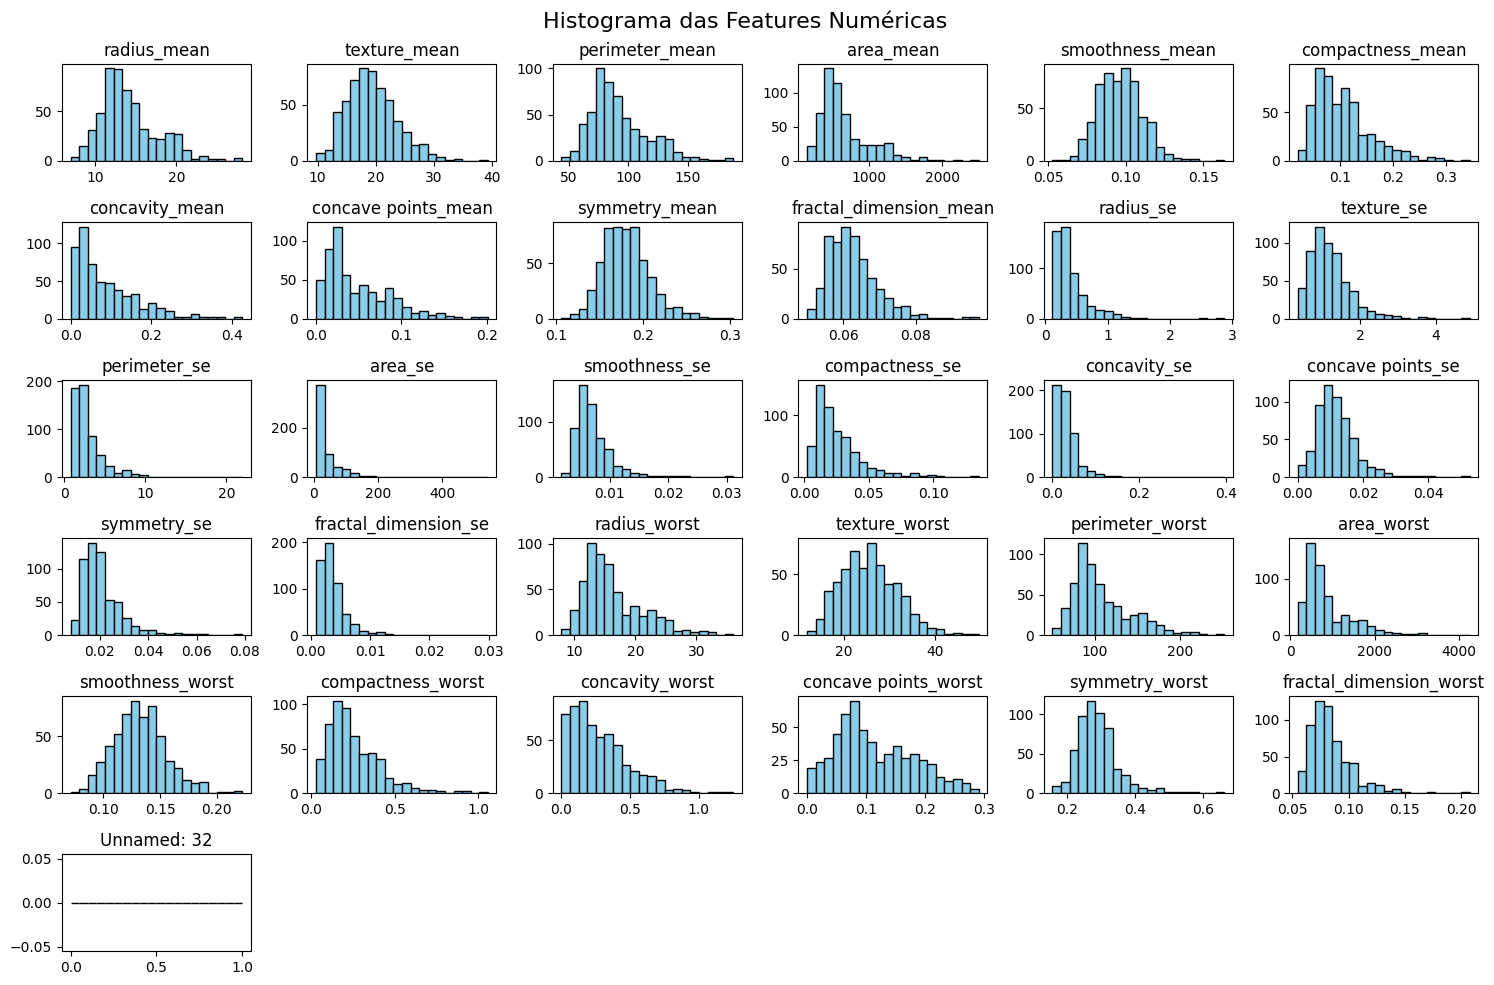

<ipython-input-22-1cb7bb1a57db>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=dataset, palette='viridis')


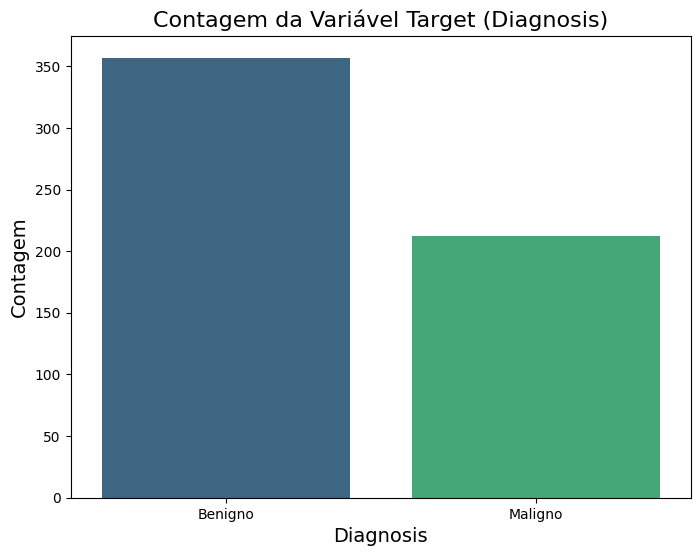

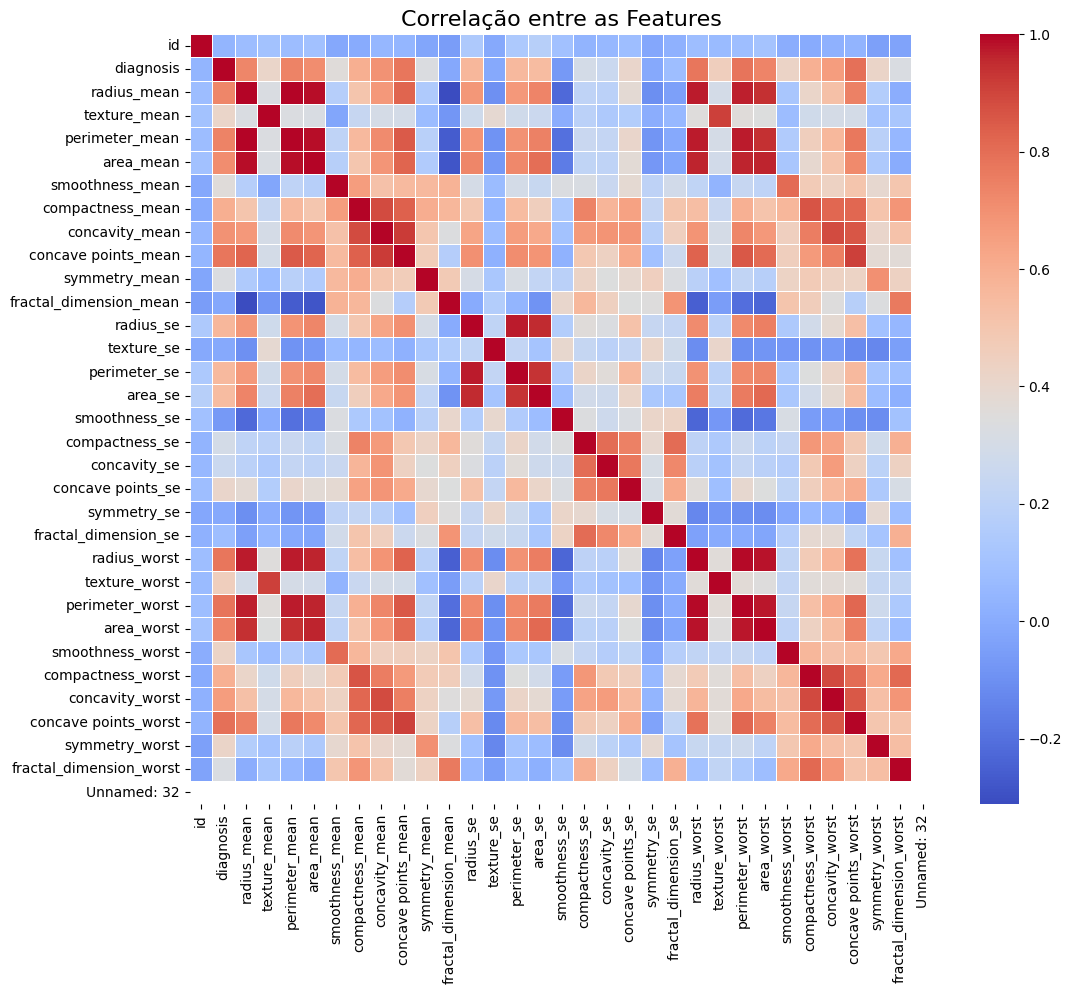


Dataset Tratado:



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,NaN
1,842517,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,NaN
2,84300903,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,NaN
3,84348301,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,NaN
4,84358402,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,NaN


In [22]:
# Carregar o dataset
dataset = pd.read_csv('data.csv')

# Exibir informações sobre o conjunto de dados
print('\nInformações sobre o Dataset:\n')
print(dataset.info())

# Verificar se há valores nulos no conjunto de dados
print('\nValores Nulos no Dataset:\n')
print(dataset.isnull().sum())

# Exibir as primeiras linhas do conjunto de dados
print('\nAmostra do Dataset Original:\n')
display(dataset.head())

# Converter os labels para números
dataset['diagnosis'] = dataset['diagnosis'].astype('category')
dataset['diagnosis'] = dataset['diagnosis'].cat.codes

# Histograma das features numéricas
numeric_features = dataset.select_dtypes(include=['float64'])
numeric_features.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black', grid=False)
plt.suptitle('Histograma das Features Numéricas', fontsize=16)
plt.tight_layout()
plt.show()

# Gráfico de contagem da variável target
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=dataset, palette='viridis')
plt.title('Contagem da Variável Target (Diagnosis)', fontsize=16)
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Benigno', 'Maligno'])
plt.show()

# Correlação entre as features
plt.figure(figsize=(12, 10))
sns.heatmap(dataset.corr(), cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlação entre as Features', fontsize=16)
plt.show()

# Normalizar as features na escala 0..1
scaler = MinMaxScaler()
columns_to_normalize = dataset.columns[1:]  # Todas as colunas exceto 'id' e 'diagnosis'
dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])

# Exibir o dataset tratado
print('\nDataset Tratado:\n')
display(dataset.head())

🤖 Resultados

In [37]:
#3.1) Escolher 3 algoritmos de aprendizado de máquina diferentes com 3 variações de parâmetros para cada um deles. Um total de 9 variações;

# Definir experimento e conectar ao MLflow
exp_mlflow_ciclo2 = "exp_projeto_ciclo_2"
mlflow.set_tracking_uri("https://ef00-35-231-71-79.ngrok-free.app/")

# Carregar o conjunto de dados
data = load_breast_cancer()
X, y = data.data, data.target

# Definir as variações de parâmetros para cada algoritmo
logistic_regression_params = [
    {"penalty": "l1", "C": 1.0, "solver": "liblinear"},
    {"penalty": "l2", "C": 0.5, "solver": "liblinear"},
    {"penalty": "l2", "C": 0.1, "solver": "liblinear"}
]

knn_params = [
    {"n_neighbors": 5, "weights": "uniform", "algorithm": "auto"},
    {"n_neighbors": 10, "weights": "distance", "algorithm": "auto"},
    {"n_neighbors": 15, "weights": "uniform", "algorithm": "ball_tree"}
]

decision_tree_params = [
    {"criterion": "gini", "max_depth": None, "min_samples_split": 2},
    {"criterion": "entropy", "max_depth": 5, "min_samples_split": 5},
    {"criterion": "gini", "max_depth": 10, "min_samples_split": 10}
]

# Função para treinar e avaliar o classificador
def train_and_evaluate_classifier(model, X, y):
    # Treinar o classificador
    model.fit(X, y)

    # Fazer previsões no conjunto de dados
    y_pred = model.predict(X)

    # Calcular a acurácia
    accuracy = accuracy_score(y, y_pred)
    return accuracy

# Função que vai rodar experimentos para um algoritmo específico
def run_experiment(model, params, algorithm_name):
    for i, param_set in enumerate(params):
        # Calcular as métricas utilizando validação cruzada de 10 folds
        scores = cross_val_score(model(**param_set), X, y, cv=10)
        # Calcular a média das métricas
        mean_accuracy = np.mean(scores)
        print(f"{algorithm_name} - Variação {i+1}: Acurácia Média = {mean_accuracy:.4f}")
        # Log das métricas no MLflow
        with mlflow.start_run(run_name=f"{algorithm_name}_var{i+1}", nested=True):
            mlflow.log_params(param_set)
            mlflow.log_metric("accuracy", mean_accuracy)

            # Treinar o classificador com todos os dados e log do modelo treinado
            model_instance = model(**param_set)
            model_instance.fit(X, y)
            mlflow.sklearn.log_model(model_instance, "model")

# Rodar experimentos para o algoritmo Regressão Logística
print("Regressão Logística:")
run_experiment(LogisticRegression, logistic_regression_params, "LogisticRegression")

# Rodar experimentos para o algoritmo KNN
print("\nKNN:")
run_experiment(KNeighborsClassifier, knn_params, "KNN")

# Rodar experimentos para o algoritmo Árvore de Decisão
print("\nÁrvore de Decisão:")
run_experiment(DecisionTreeClassifier, decision_tree_params, "DecisionTree")

Regressão Logística:


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression - Variação 1: Acurácia Média = 0.9473


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression - Variação 2: Acurácia Média = 0.9491
LogisticRegression - Variação 3: Acurácia Média = 0.9438

KNN:
KNN - Variação 1: Acurácia Média = 0.9298
KNN - Variação 2: Acurácia Média = 0.9315
KNN - Variação 3: Acurácia Média = 0.9298

Árvore de Decisão:
DecisionTree - Variação 1: Acurácia Média = 0.9139
DecisionTree - Variação 2: Acurácia Média = 0.9367
DecisionTree - Variação 3: Acurácia Média = 0.9052


In [ ]:
#3.2) Testar também o Bagging e RandomForest com parâmetros padrão ou alguma parametrização customizada (caso queira);

# Nome do experimento no MLflow
exp_mlflow_ciclo2 = "exp_projeto_ciclo_2"

# Iniciar o tracking do MLflow
mlflow.set_tracking_uri("https://ef00-35-231-71-79.ngrok-free.app/")
mlflow.set_experiment(exp_mlflow_ciclo2)

# Carregar o conjunto de dados
data = load_breast_cancer()
X, y = data.data, data.target

# Definir os parâmetros padrão e customizados para RandomForest
random_forest_default_params = {"n_estimators": 100, "max_depth": None, "min_samples_split": 2}
random_forest_custom_params = {"n_estimators": 50, "max_depth": 5, "min_samples_split": 5}

# Definir os parâmetros padrão e customizados para Bagging
bagging_default_params = {"n_estimators": 100}
bagging_custom_params = {"n_estimators": 50}

# Função que vai rodar experimentos para um algoritmo específico
def run_experiment(model, params, algorithm_name):
    for i, param_set in enumerate(params):
        # Calcular as métricas utilizando validação cruzada de 10 folds
        scores = cross_val_score(model(**param_set), X, y, cv=10)
        # Calcular a média das métricas
        mean_accuracy = scores.mean()
        print(f"{algorithm_name} com parâmetros {param_set} - Variação {i+1}: Acurácia Média = {mean_accuracy:.4f}")
        # Log das métricas no MLflow
        with mlflow.start_run(run_name=f"{algorithm_name}_var{i+1}", nested=True):
            mlflow.log_params(param_set)
            mlflow.log_metric("accuracy", mean_accuracy)

            # Treinar o classificador com todos os dados e log do modelo treinado
            model_instance = model(**param_set)
            model_instance.fit(X, y)
            mlflow.sklearn.log_model(model_instance, "model")

# Rodar experimentos para o algoritmo RandomForest com parâmetros padrão e customizados
print("\nRandomForest com parâmetros padrão:")
run_experiment(RandomForestClassifier, [random_forest_default_params], "RandomForest_Default")
print("\nRandomForest com parâmetros customizados:")
run_experiment(RandomForestClassifier, [random_forest_custom_params], "RandomForest_Custom")

# Rodar experimentos para o algoritmo Bagging com parâmetros padrão e customizados
print("\nBagging com parâmetros padrão:")
run_experiment(BaggingClassifier, [bagging_default_params], "Bagging_Default")
print("\nBagging com parâmetros customizados:")
run_experiment(BaggingClassifier, [bagging_custom_params], "Bagging_Custom")


RandomForest com parâmetros padrão:
RandomForest_Default com parâmetros {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2} - Variação 1: Acurácia Média = 0.9632

RandomForest com parâmetros customizados:
RandomForest_Custom com parâmetros {'n_estimators': 50, 'max_depth': 5, 'min_samples_split': 5} - Variação 1: Acurácia Média = 0.9596

Bagging com parâmetros padrão:
Bagging_Default com parâmetros {'n_estimators': 100} - Variação 1: Acurácia Média = 0.9632

Bagging com parâmetros customizados:
Bagging_Custom com parâmetros {'n_estimators': 50} - Variação 1: Acurácia Média = 0.9561


In [ ]:
#3.3) Executar experimentos com o GradientBoosting, XGBoost e LightGBM, com parâmetros padrão ou alguma parametrização customizada

# Nome do experimento no MLflow
exp_mlflow_ciclo2 = "exp_projeto_ciclo_2"

# Iniciar o tracking do MLflow
mlflow.set_tracking_uri("https://ef00-35-231-71-79.ngrok-free.app/")
mlflow.set_experiment(exp_mlflow_ciclo2)

# Carregar o conjunto de dados
data = load_breast_cancer()
X, y = data.data, data.target

# Função para treinar e avaliar o classificador
def train_and_evaluate_classifier(model, X, y):
    # Treinar o classificador
    model.fit(X, y)

    # Fazer previsões no conjunto de dados
    y_pred = model.predict(X)

    # Calcular a acurácia
    accuracy = accuracy_score(y, y_pred)
    return accuracy

# Função que vai rodar experimentos para um algoritmo específico
def run_experiment(model, params, algorithm_name):
    for i, param_set in enumerate(params):
        # Calcular as métricas utilizando validação cruzada de 10 folds
        scores = cross_val_score(model(**param_set), X, y, cv=10)
        # Calcular a média das métricas
        mean_accuracy = np.mean(scores)
        print(f"{algorithm_name} com parâmetros {param_set} - Variação {i+1}: Acurácia Média = {mean_accuracy:.4f}")
        # Log das métricas no MLflow
        with mlflow.start_run(run_name=f"{algorithm_name}_var{i+1}", nested=True):
            mlflow.log_params(param_set)
            mlflow.log_metric("accuracy", mean_accuracy)

            # Treinar o classificador com todos os dados e log do modelo treinado
            model_instance = model(**param_set)
            model_instance.fit(X, y)
            mlflow.sklearn.log_model(model_instance, "model")

# Rodar experimentos para o algoritmo GradientBoosting com parâmetros padrão e customizados
print("\nGradientBoosting com parâmetros padrão:")
run_experiment(GradientBoostingClassifier, [gradient_boosting_default_params], "GradientBoosting_Default")
print("\nGradientBoosting com parâmetros customizados:")
run_experiment(GradientBoostingClassifier, [gradient_boosting_custom_params], "GradientBoosting_Custom")

# Rodar experimentos para o algoritmo XGBoost com parâmetros padrão e customizados
print("\nXGBoost com parâmetros padrão:")
run_experiment(XGBClassifier, [xgboost_default_params], "XGBoost_Default")
print("\nXGBoost com parâmetros customizados:")
run_experiment(XGBClassifier, [xgboost_custom_params], "XGBoost_Custom")

# Rodar experimentos para o algoritmo LightGBM com parâmetros padrão e customizados
print("\nLightGBM com parâmetros padrão:")
run_experiment(LGBMClassifier, [lightgbm_default_params], "LightGBM_Default")
print("\nLightGBM com parâmetros customizados:")
run_experiment(LGBMClassifier, [lightgbm_custom_params], "LightGBM_Custom")


GradientBoosting com parâmetros padrão:
GradientBoosting_Default com parâmetros {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3} - Variação 1: Acurácia Média = 0.9614

GradientBoosting com parâmetros customizados:
GradientBoosting_Custom com parâmetros {'n_estimators': 50, 'learning_rate': 0.05, 'max_depth': 5} - Variação 1: Acurácia Média = 0.9491

XGBoost com parâmetros padrão:
XGBoost_Default com parâmetros {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3} - Variação 1: Acurácia Média = 0.9737

XGBoost com parâmetros customizados:
XGBoost_Custom com parâmetros {'n_estimators': 50, 'learning_rate': 0.05, 'max_depth': 5} - Variação 1: Acurácia Média = 0.9666

LightGBM com parâmetros padrão:
[LightGBM] [Info] Number of positive: 322, number of negative: 190
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000406 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5106
[LightGBM] [In

In [30]:
#3.4) Testar todos os métodos de seleção dinâmica (OLA, LCA, KNORAU, KNORA-E e MCB) com os modelos gerados com o Bagging e
#também com os modelos gerados com o RandomForest; (métodos de seleção dinâmica serão um plus para quem fizer e não será mais obrigatório!)

# Nome do experimento no MLflow
exp_mlflow_ciclo2 = "exp_projeto_ciclo_2"

# Iniciar o tracking do MLflow
mlflow.set_tracking_uri("https://ef00-35-231-71-79.ngrok-free.app/")

# Carregar o conjunto de dados
data = load_breast_cancer()
X, y = data.data, data.target

# Função para treinar e avaliar o classificador
def train_and_evaluate_classifier(classifier, X, y):
    # Treinar o classificador
    classifier.fit(X, y)

    # Fazer previsões no conjunto de dados
    y_pred = classifier.predict(X)

    # Calcular a acurácia
    accuracy = accuracy_score(y, y_pred)
    return accuracy

# Função que vai rodar experimentos para um modelo específico
def run_experiment(model, model_params, algorithm_name, selection_methods=None):
    for i, param_set in enumerate(model_params):
        with mlflow.start_run(run_name=f"{algorithm_name}_var{i+1}"):
            mlflow.log_params(param_set)
            model_instance = model(**param_set)
            scores = cross_val_score(model_instance, X, y, cv=10)
            mean_accuracy = scores.mean()
            mlflow.log_metric("accuracy", mean_accuracy)
            print(f"{algorithm_name} - Variação {i+1}: Acurácia média = {mean_accuracy:.4f}")

            # Log do modelo treinado
            mlflow.sklearn.log_model(model_instance, f"{algorithm_name}_model_var{i+1}")

        if selection_methods is not None:
            # Executar experimentos de seleção dinâmica
            for method in selection_methods:
                with mlflow.start_run(run_name=f"{algorithm_name}_{method.__class__.__name__}_var{i+1}"):
                    mlflow.log_params({"selection_method": method.__class__.__name__})
                    model_instance = model(**param_set)
                    scores = cross_val_score(model_instance, X, y, cv=10)
                    mean_accuracy = scores.mean()
                    mlflow.log_metric("accuracy", mean_accuracy)
                    print(f"{algorithm_name} com {method.__class__.__name__}: Acurácia média = {mean_accuracy:.4f}")

                    # Log do modelo treinado
                    mlflow.sklearn.log_model(model_instance, f"{algorithm_name}_{method.__class__.__name__}_model_var{i+1}")

# Definir os parâmetros padrão para Bagging e RandomForest
bagging_default_params = {"n_estimators": 10}
random_forest_default_params = {"n_estimators": 100}

# Definir os modelos
models = [
    (BaggingClassifier, bagging_default_params, "Bagging"),
    (RandomForestClassifier, random_forest_default_params, "RandomForest")
]

# Definir os métodos de seleção dinâmica
selection_methods = [
    OLA(),
    LCA(),
    KNORAU(),
    KNORAE(),
    MCB()
]

# Rodar os experimentos para cada modelo e método de seleção dinâmica
for model, model_params, algorithm_name in models:
    print(f"\n{algorithm_name}:")
    run_experiment(model, [model_params], algorithm_name, selection_methods)


Bagging:
Bagging - Variação 1: Acurácia média = 0.9350
Bagging com OLA: Acurácia média = 0.9315
Bagging com LCA: Acurácia média = 0.9491
Bagging com KNORAU: Acurácia média = 0.9526
Bagging com KNORAE: Acurácia média = 0.9561
Bagging com MCB: Acurácia média = 0.9420

RandomForest:
RandomForest - Variação 1: Acurácia média = 0.9561
RandomForest com OLA: Acurácia média = 0.9631
RandomForest com LCA: Acurácia média = 0.9578
RandomForest com KNORAU: Acurácia média = 0.9614
RandomForest com KNORAE: Acurácia média = 0.9631
RandomForest com MCB: Acurácia média = 0.9578


In [29]:
#3.5) Para todos os experimentos o cálculo das métricas (Acurácia, Precision, Recall, Specificity, AUC (classificação) ou MSE, RMSE,
# MAPE (regressão) deve ser a média dos 10 folds da validação cruzada;

# Nome do experimento no MLflow
exp_mlflow_ciclo2 = "exp_projeto_ciclo_2"

# Iniciar o tracking do MLflow
mlflow.set_tracking_uri("https://ef00-35-231-71-79.ngrok-free.app/")

# Carregar o conjunto de dados
data = load_breast_cancer()
X, y = data.data, data.target

# Inicializar o classificador
classifier = RandomForestClassifier()

# Definir as métricas que deseja calcular
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'recall': recall_score,
    'roc_auc': roc_auc_score
}

# Loop sobre as métricas
for metric_name, metric_func in metrics.items():
    # Converter a função de métrica em um scorer
    scorer = make_scorer(metric_func)
    # Calcular as métricas utilizando validação cruzada
    scores = cross_val_score(classifier, X, y, cv=10, scoring=scorer)
    # Calcular a média das métricas
    mean_score = np.mean(scores)
    # Registrar a média das métricas no MLflow
    with mlflow.start_run() as run:
        mlflow.log_param("classifier", classifier.__class__.__name__)
        mlflow.log_metric(f'mean_{metric_name}', mean_score)

        # Salvar o modelo treinado
        mlflow.sklearn.log_model(classifier, "random_forest_model")

    print(f'Mean {metric_name}: {mean_score:.4f}')

Mean accuracy: 0.9614
Mean precision: 0.9653
Mean recall: 0.9803
Mean roc_auc: 0.9520


In [26]:
#3.6) Utilizar 1 método de seleção de features para todos os experimentos (usar só um método de seleção de features);

# Nome do experimento no MLflow
exp_mlflow_ciclo2 = "exp_projeto_ciclo_2"

# Iniciar o tracking do MLflow
mlflow.set_tracking_uri("https://ef00-35-231-71-79.ngrok-free.app/")

# Carregar o conjunto de dados
data = load_breast_cancer()
X, y = data.data, data.target

# Definir o método de seleção de features
selector = SelectKBest(score_func=f_classif, k=1)  # definindo o número de features
method_name = 'SelectKBest_f_classif'  # Nome do método de seleção de features

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar o método de seleção de features aos dados de treinamento e teste
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Função para treinar e avaliar o classificador
def train_and_evaluate_classifier(classifier, X_train, X_test, y_train, y_test):
    # Treinar o classificador com as features selecionadas
    classifier.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = classifier.predict(X_test)

    # Calcular a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Lista de modelos de classificação
models = [
    RandomForestClassifier(),
    # Outros modelos podem ser adicionados aqui
]

# Executar os experimentos para cada modelo
for model in models:
    with mlflow.start_run():
        # Treinar e avaliar o classificador com seleção de features
        accuracy = train_and_evaluate_classifier(model, X_train_selected, X_test_selected, y_train, y_test)

        # Registrar a acurácia no MLflow
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_param("feature_selection_method", method_name)

        # Log do modelo treinado
        mlflow.sklearn.log_model(model, "model")

        print(f'Acurácia ({method_name}): {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Acurácia (SelectKBest_f_classif): 0.9123


In [31]:
#3.9) Registrar os 3 (três) modelos que tiveram o melhor desempenho (baseado na acurácia);

# Definir o nome do experimento no MLflow
exp_mlflow_ciclo2 = "exp_projeto_ciclo_2"

# Iniciar o tracking do MLflow
mlflow.set_tracking_uri("https://ef00-35-231-71-79.ngrok-free.app/")
mlflow.set_experiment(exp_mlflow_ciclo2)

# Acessa todos os runs
runs = mlflow.search_runs()

# Ordenar os runs pela métrica de acurácia em ordem decrescente
runs_sorted = runs.sort_values(by='metrics.accuracy', ascending=False)

# Recuperar os três melhores runs
top_3_runs = runs_sorted.head(3)

# Loop para os três melhores modelos
for idx, run_id in enumerate(top_3_runs['run_id'], start=1):
    # Recuperar informações do run
    run_info = mlflow.get_run(run_id)
    run_name = run_info.data.tags.get("mlflow.runName")
    accuracy = run_info.data.metrics.get("accuracy")

    # Imprimir informações sobre o modelo
    print(f"\nModelo {idx}:")
    print(f"Nome: {run_name}")
    print(f"Acurácia: {accuracy}")


Modelo 1:
Nome: RandomForest_OLA_var1
Acurácia: 0.9631265664160402

Modelo 2:
Nome: RandomForest_KNORAE_var1
Acurácia: 0.963095238095238

Modelo 3:
Nome: RandomForest_KNORAU_var1
Acurácia: 0.9613721804511279


In [36]:
#3.10) Escrever um código Cliente para carregar os modelos registrados e exibir as informações desses modelos com a sua descrição.

# Configura o cliente MLflow com o URL fornecido pelo NGROK
mlflow.set_tracking_uri("https://ef00-35-231-71-79.ngrok-free.app/")

# Acessa todos os runs
runs = mlflow.search_runs()

# Ordena os runs pela métrica de acurácia em ordem decrescente
runs_sorted = runs.sort_values(by='metrics.accuracy', ascending=False)

# Recupera os três melhores runs
top_3_runs = runs_sorted.head(3)

# Dicionário de descrições dos modelos
model_descriptions = {
    "RandomForest_OLA_var1": "RandomForest OLA variação 1",
    "RandomForest_KNORAE_var1": "RandomForest KNORAE variação 1",
    "RandomForest_KNORAU_var1": "RandomForest KNORAU variação 1",
}

# Marca sobre os três melhores runs e exibe os detalhes
for idx, row in top_3_runs.iterrows():
    run_id = row['run_id']
    accuracy = row['metrics.accuracy']
    model_name = mlflow.get_run(run_id).data.tags.get("mlflow.runName")
    description = model_descriptions.get(model_name, "Descrição não encontrada")
    print(f"Modelo {idx+1}:")
    print(f"  ID do Run: {run_id}")
    print(f"  Nome do Modelo: {model_name}")
    print(f"  Descrição: {description}")
    print(f"  Acurácia: {accuracy}")
    print()

Modelo 5:
  ID do Run: 7c1640e155d94520b488efc3e14dd81b
  Nome do Modelo: RandomForest_OLA_var1
  Descrição: RandomForest OLA variação 1
  Acurácia: 0.9631265664160402

Modelo 2:
  ID do Run: 484711e51194453da2be80e0bce3e17d
  Nome do Modelo: RandomForest_KNORAE_var1
  Descrição: RandomForest KNORAE variação 1
  Acurácia: 0.963095238095238

Modelo 3:
  ID do Run: 3dd66080f0994b8baa39c15e7d8df139
  Nome do Modelo: RandomForest_KNORAU_var1
  Descrição: RandomForest KNORAU variação 1
  Acurácia: 0.9613721804511279



## 🚀Uso do Ngrok para fazer a Conexão com o MLflow

In [ ]:
#Ngrok para fazer a conexão no MLflow para guardar e verificar os Trackings

get_ipython(). system_raw("mlflow ui --port 5000 &")
# Rodar o NGROK e verificar os experimentos no tracking

# Terminate open tunnels if exist
ngrok.kill()

# Setting the authtoken (optional)
# Get your authtoken from https://dashboard.ngrok.com/auth
NGROK_AUTH_TOKEN = "2hNYPPZVC0Xisj6XhZMMgzi3771_2JKHa6nYXyxa484dBxJyZ"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("Endereço do MLflow:", ngrok_tunnel.public_url)

Endereço do MLflow: https://ef00-35-231-71-79.ngrok-free.app


In [ ]:
# Código do Ngrok para gerar o link do MLflow resgatando os resultados através do cliente

# Configura a URI de rastreamento para o MLflow (usando o link gerado pelo Ngrok)
mlflow.set_tracking_uri("https://ef00-35-231-71-79.ngrok-free.app/")

## 📈 Gráfico de Barras - Acurácia dos Modelos

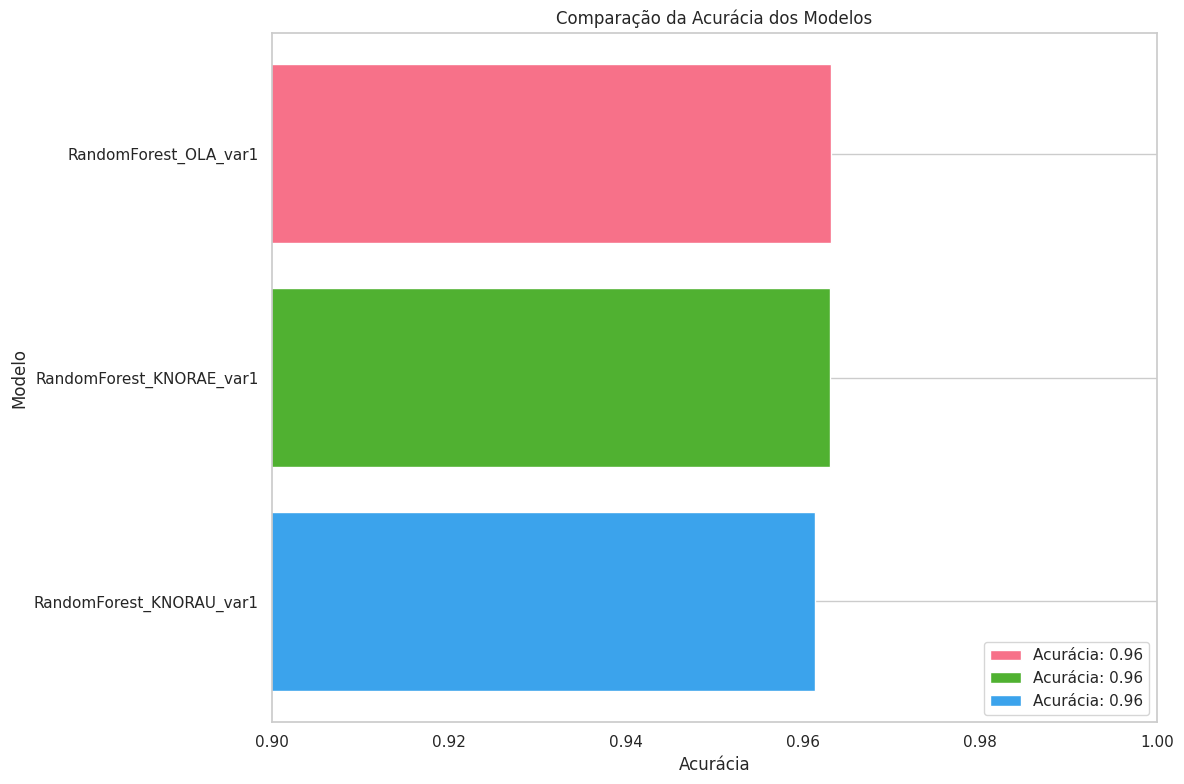

In [35]:
# Definir a URI de rastreamento do MLflow
mlflow.set_tracking_uri("https://ef00-35-231-71-79.ngrok-free.app/")

# Lista de IDs de execução dos modelos
run_ids = [

   "7c1640e155d94520b488efc3e14dd81b",
   "484711e51194453da2be80e0bce3e17d",
   "3dd66080f0994b8baa39c15e7d8df139",
]

# Função para carregar e exibir informações do modelo
def load_model_metrics(run_id):
    run = mlflow.get_run(run_id)
    run_name = run.data.tags.get("mlflow.runName")
    metrics = run.data.metrics

    return run_name, metrics

# Lista para armazenar as métricas de todos os modelos
all_metrics = []

# Iterar sobre os IDs de execução e carregar os modelos
for run_id in run_ids:
    run_name, metrics = load_model_metrics(run_id)
    all_metrics.append((run_name, metrics))

# Criar um gráfico de barras para visualizar as métricas
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Cores personalizadas para os modelos
colors = sns.color_palette("husl", len(all_metrics))

# Plotar cada métrica com sua respectiva cor
for i, (run_name, metrics) in enumerate(all_metrics):
    accuracy = metrics['accuracy']
    plt.barh(run_name, accuracy, color=colors[i], label=f'Acurácia: {accuracy:.2f}')

plt.xlabel('Acurácia')
plt.ylabel('Modelo')
plt.title('Comparação da Acurácia dos Modelos')
plt.legend(loc='lower right')
plt.grid(axis='x')
plt.xlim(0.9, 1.0)  # Define o limite do eixo x
plt.gca().invert_yaxis()  # Inverte a ordem dos modelos no eixo y
plt.tight_layout()  # Para ajustar o layout evitando sobreposição
plt.show()